In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# set plottestørrelser
NN = 100
X1, X2 = -100, 100
Y1, Y2 = X1,X2

xlist = np.linspace(X1, X2, NN)
ylist = np.linspace(Y1, Y2, NN)
X, Y = np.meshgrid(xlist, ylist)

Gradient i et punkt kan vi regne ut som på vanlig måte. 

$$\frac{\Delta Z}{\Delta A} = \sqrt{\frac{\Delta Z}{\Delta x}^2 + \frac{\Delta Z}{\Delta y}^2}$$, (skal være kvadratrot, men den dukker ikke opp!)



hvor A er retningen til den maksimale gradienten. Når vi skal evaluere det i et punkt *ii,jj*, så skriver vi: 

$$\frac{\Delta Z}{\Delta A}|_{(ii,jj)} \approx \sqrt{\left(\frac{Z_{ii+1} - Z_{ii-1}}{2\Delta x}\right)^2 + \left(\frac{Z_{jj+1} - Z_{jj-1}}{2 \Delta y}\right)^2}$$ (kvadratrot her ogs), 

(det er mulig å gjøre dette mer nøyaktig, men det er ikke så viktig nå..) 

Så vi skriver en funksjon som kan regne ut dette for oss, `calcGrad`

In [3]:
def calcGrad(x,y,field): 
    #finne punktet i xlist / ylist
    ii = np.argmin(np.abs(x-xlist))
    jj = np.argmin(np.abs(y-ylist))
    
    #finne avstanden mellom x og y
    dx = xlist[1]-xlist[0]
    dy = ylist[1]-ylist[0]
    
    # finne gradienten i F(y,x) i både x og y retning.
    #merk! F  = F(y,x)
    dFdx = (field[jj,ii+1]-field[jj,ii-1])/(2*dx)
    dFdy = (field[jj+1,ii]-field[jj-1,ii])/(2*dy)
    
    return dFdx,dFdy
    
def pythagoras(dFdx,dFdy): 
    return np.sqrt(dFdx**2+dFdy**2)

def findDirection(dFdx,dFdy): 
    return np.rad2deg(np.arctan(dFdy/dFdx))

In [4]:
#konturfelt, figur 1
Z1 = 10. * (X + 100.) / 200.
Z2 = 10. * (Y + 100.) / 200.
Z = Z1 - Z2

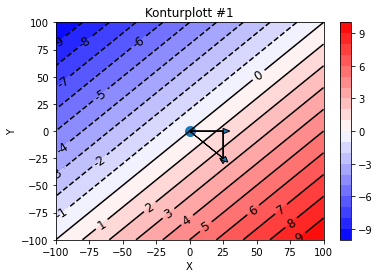

In [5]:
#lager en figur

#
fig, ax = plt.subplots()

#hvor vi har lyst til å tegne konturene mine
levels = np.arange(-10,10.1,1.)

# tegne de fylte konturene, fylt med cmap,på nivåene levels, med verdiene fra Z
c = ax.contourf(X,Y,Z,levels,cmap='bwr')

# isolinjer (svarte)
contour = ax.contour(X,Y,Z,levels,colors='k')
#sett merkelapper på isolinjene
ax.clabel(contour,colors='k',fmt='%1.0f',fontsize=12)

#git plottet noen merkelapper
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_title('Konturplott #1')

# lag en fargeskala basert på de fylte konturene. 
cbar = fig.colorbar(c)

#regn ut og plot gradient
dZdx,dZdy = calcGrad(0,0,Z)
ax.scatter(0,0,s=100)
scale = 500
ax.arrow(0,0,dZdx*scale,0,head_length=5,head_width=5)
ax.arrow(dZdx*scale,0,0,dZdy*scale,head_length=5,head_width=5)

ax.arrow(0,0,dZdx*scale,dZdy*scale,head_length=5,head_width=5)

In [6]:
pythagoras(dZdx,dZdy)

0.07071067811865488

In [7]:
findDirection(dZdx,dZdy)

-45.0

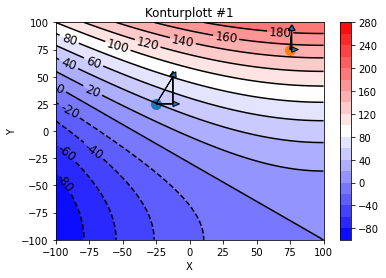

In [8]:
#konturfelt, figur 2
FAC = 1./400.
Z1 = -(X - 100.) **2
Z2 = 2.*(Y + 100.) **2
Z = FAC * (Z1 + Z2)

#lager en figur


fig, ax = plt.subplots()

#hvor vi har lyst til å tegne konturene mine
levels = np.arange(-100, 300., 20.)

# tegne de fylte konturene, fylt med cmap,på nivåene levels, med verdiene fra Z
c = ax.contourf(X,Y,Z,levels,cmap='bwr')

# isolinjer (svarte)
contour = ax.contour(X,Y,Z,levels,colors='k')
#sett merkelapper på isolinjene
ax.clabel(contour,colors='k',fmt='%1.0f',fontsize=12)

#git plottet noen merkelapper
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_title('Konturplott #1')

# lag en fargeskala basert på de fylte konturene. 
cbar = fig.colorbar(c)

ax.scatter(-25,25,s=100)
dZdx,dZdy = calcGrad(-25,25,Z)

scale = 20
ax.arrow(-25,25,dZdx*scale,0,head_length=5,head_width=5)
ax.arrow(-25+dZdx*scale,25,0,dZdy*scale,head_length=5,head_width=5)
ax.arrow(-25,25,dZdx*scale,dZdy*scale,head_length=5,head_width=5)

ax.scatter(75,75,s=100)
dZdx,dZdy = calcGrad(75,75,Z)

scale = 10
ax.arrow(75,75,dZdx*scale,0,head_length=5,head_width=5)
ax.arrow(75+dZdx*scale,75,0,dZdy*scale,head_length=5,head_width=5)
ax.arrow(75,75,dZdx*scale,dZdy*scale,head_length=5,head_width=5)


In [9]:
dZdy

1.7575757575757642

In [10]:
dZdx

0.12121212121211439

In [11]:
pythagoras(dZdy,dZdx)

1.7617505277271133

In [12]:
findDirection(dZdx,dZdy)

86.05481377096268

In [13]:
#konturfelt, figur 3
FAC = 1./2000.
Z1 = FAC * (-(X + 60.) ** 2 - (Y + 50.) ** 2)
Z1_ = np.exp( Z1 )

FAC = 1./4000.
Z2 = FAC * (-(X - 75.) ** 2 - (Y - 20.) ** 2)
Z2_ = - np.exp( Z2 )

Z =  Z1_ + Z2_

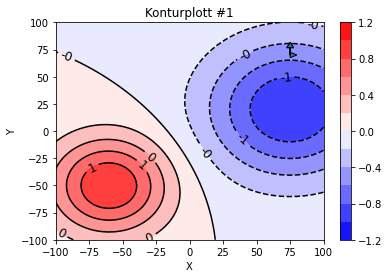

In [14]:
fig, ax = plt.subplots()

#hvor vi har lyst til å tegne konturene mine
levels = np.arange(-1.2, 1.21, 0.2)

# tegne de fylte konturene, fylt med cmap,på nivåene levels, med verdiene fra Z
c = ax.contourf(X,Y,Z,levels,cmap='bwr')

# isolinjer (svarte)
contour = ax.contour(X,Y,Z,levels,colors='k')
#sett merkelapper på isolinjene
ax.clabel(contour,colors='k',fmt='%1.0f',fontsize=12)

#git plottet noen merkelapper
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_title('Konturplott #1')

# lag en fargeskala basert på de fylte konturene. 
cbar = fig.colorbar(c)

dZdx,dZdy = calcGrad(75,70,Z)

scale = 500
ax.arrow(75,70,dZdx*scale,0,head_length=5,head_width=5)
ax.arrow(75+dZdx*scale,70,0,dZdy*scale,head_length=5,head_width=5)
ax.arrow(75,70,dZdx*scale,dZdy*scale,head_length=5,head_width=5)

Vi regner ut gradienten i alle punktene! 

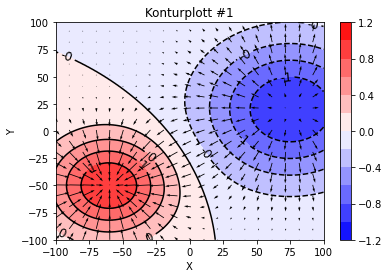

In [15]:
fig, ax = plt.subplots()

#hvor vi har lyst til å tegne konturene mine
levels = np.arange(-1.2, 1.21, 0.2)

# tegne de fylte konturene, fylt med cmap,på nivåene levels, med verdiene fra Z
c = ax.contourf(X,Y,Z,levels,cmap='bwr')

# isolinjer (svarte)
contour = ax.contour(X,Y,Z,levels,colors='k')
#sett merkelapper på isolinjene
ax.clabel(contour,colors='k',fmt='%1.0f',fontsize=12)

#git plottet noen merkelapper
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_title('Konturplott #1')

# lag en fargeskala basert på de fylte konturene. 
cbar = fig.colorbar(c)

dx = xlist[1]-xlist[0]

dZdy,dZdx = np.gradient(Z)


step = 5
ax.quiver(X[::step,::step],Y[::step,::step],dZdx[::step,::step],dZdy[::step,::step])



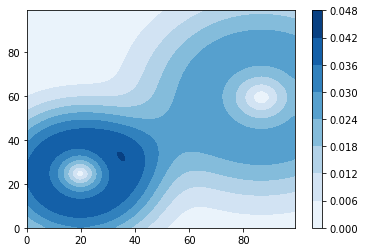

In [16]:
c = plt.contourf(pythagoras(dZdx,dZdy),cmap='Blues')
plt.colorbar(c)